In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import colors
from matplotlib import cm

In [3]:
# Segment each controlled trial run

fft = pd.read_csv('data/diego-controlled-runs/grafana_data_export oct_fftcb.csv', sep=';', engine='python', header=1)
fft['Time'] = pd.to_datetime(fft['Time'])
fft.reset_index(inplace=True, drop=True)

def get_run_code(data, start, end, condition, pressure, stiffener_kit, display=False):
    
    if display:
        figure(figsize=(20, 6), dpi=80)
        plt.scatter(x=data.iloc[start:end, :].index, 
                    y=data.iloc[start:end, :]['Value'], alpha=.7, s=5)
        plt.ylabel('FFT')
        plt.show()

    df = data.iloc[start:end, :].reset_index(drop=True)
    df['condition'] = condition
    df['pressure'] = pressure
    df['stiffener kit'] = stiffener_kit
    return df

# The run codes have to be found by index because the times are messed up
CB_FFT_Band3_B1 = get_run_code(fft[fft['Series'] == 'CB FFT Band 3'].reset_index(drop=True), 1920, 2750, 'Target', 2.3, True)
CB_FFT_Band3_B2 = get_run_code(fft[fft['Series'] == 'CB FFT Band 3'].reset_index(drop=True), 3650, 4500, 'Low', 1.8, True)
CB_FFT_Band3_B3 = get_run_code(fft[fft['Series'] == 'CB FFT Band 3'].reset_index(drop=True), 6610, 7430, 'Ultra Low', 1.4, True)
CB_FFT_Band3_A1 = get_run_code(fft[fft['Series'] == 'CB FFT Band 3'].reset_index(drop=True), 23292, 23483, 'Target', 3.4, False)
CB_FFT_Band3_A2 = get_run_code(fft[fft['Series'] == 'CB FFT Band 3'].reset_index(drop=True), 24098, 24780, 'Low', 2.7, False)
CB_FFT_Band3_A3 = get_run_code(fft[fft['Series'] == 'CB FFT Band 3'].reset_index(drop=True), 24843, 25342, 'Low', 2.0, False)
CB_FFT_Band3_A4 = get_run_code(fft[fft['Series'] == 'CB FFT Band 3'].reset_index(drop=True), 25666, 26280, 'Target', 3.4, False)
CB_FFT_Band3_A5 = get_run_code(fft[fft['Series'] == 'CB FFT Band 3'].reset_index(drop=True), 26560, 26684, 'High', 4.0, False)

Text(0.5, 0.98, 'Continuous Bond FFT Band 3, Different Run Conditions')

<Figure size 1440x576 with 0 Axes>

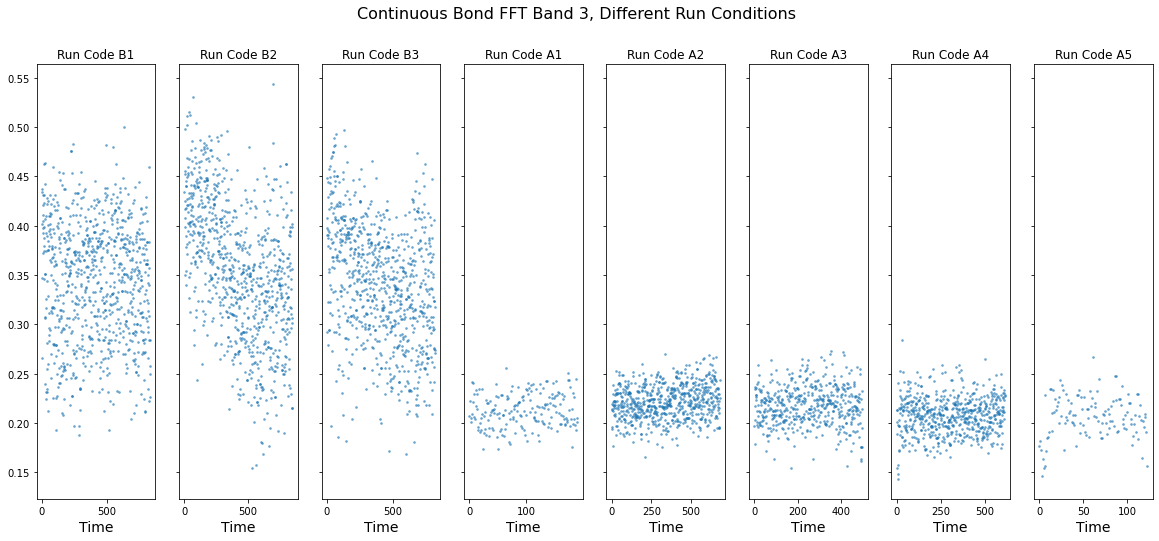

In [105]:
plt.figure(figsize=((20,8)))
fig, axs = plt.subplots(nrows=1, ncols=8, sharey=True, figsize=(20,8))

def add_to_axis(i, df, title, xlabel='Time'):
    axs[i].scatter(df.index, df['Value'], s=3, alpha=.5)
    axs[i].set_title(title)
    axs[i].set_xlabel(xlabel, fontsize=14)
    
add_to_axis(0, CB_FFT_Band3_B1, 'Run Code B1')
add_to_axis(1, CB_FFT_Band3_B2, 'Run Code B2')
add_to_axis(2, CB_FFT_Band3_B3, 'Run Code B3')
add_to_axis(3, CB_FFT_Band3_A1, 'Run Code A1')
add_to_axis(4, CB_FFT_Band3_A2, 'Run Code A2')
add_to_axis(5, CB_FFT_Band3_A3, 'Run Code A3')
add_to_axis(6, CB_FFT_Band3_A4, 'Run Code A4')
add_to_axis(7, CB_FFT_Band3_A5, 'Run Code A5')

fig.suptitle("Continuous Bond FFT Band 3, Different Run Conditions", fontsize=16)

In [30]:
domingo_band3_new_equip = pd.concat([CB_FFT_Band3_B1, CB_FFT_Band3_B2, CB_FFT_Band3_B3])
domingo_band3_new_equip = domingo_band3_new_equip.rename(columns={'Value': 'FFT'})
domingo_band3_new_equip = domingo_band3_new_equip.reset_index(drop=True)

domingo_band3_old_equip = pd.concat([CB_FFT_Band3_A1, CB_FFT_Band3_A2, CB_FFT_Band3_A3, CB_FFT_Band3_A4, CB_FFT_Band3_A5])
domingo_band3_old_equip = domingo_band3_old_equip.rename(columns={'Value': 'FFT'})
domingo_band3_old_equip = domingo_band3_old_equip.reset_index(drop=True)

# Combine all trials into one DF
domingo_band3 = pd.concat([domingo_band3_new_equip, domingo_band3_old_equip])
domingo_band3 = domingo_band3.reset_index(drop=True)
domingo_band3
# domingo_band3.to_csv('data/reformated/diego-controlled-oct-fftcb-band3.csv')

,Series,Time,FFT,condition,pressure,stiffener kit
0,CB FFT Band 3,2021-06-21 09:25:30+02:00,0.402173,Target,2.3,True
1,CB FFT Band 3,2021-06-21 09:25:30+02:00,0.434493,Target,2.3,True
2,CB FFT Band 3,2021-06-21 09:25:30+02:00,0.437564,Target,2.3,True
3,CB FFT Band 3,2021-06-21 09:25:30+02:00,0.265910,Target,2.3,True
4,CB FFT Band 3,2021-06-21 09:25:30+02:00,0.347339,Target,2.3,True
...,...,...,...,...,...,...
4605,CB FFT Band 3,2021-06-21 16:36:50+02:00,0.195899,High,4.0,False
4606,CB FFT Band 3,2021-06-21 16:36:50+02:00,0.209436,High,4.0,False
4607,CB FFT Band 3,2021-06-21 16:36:50+02:00,0.205936,High,4.0,False
4608,CB FFT Band 3,2021-06-21 16:36:50+02:00,0.190878,High,4.0,False


In [37]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def silhouette_cluster_analysis(data, df, algorithm='hac'):
    range_n_clusters = np.arange(2,12)

    best_clustering = None
    best_sil_avg = 0

    for n_clusters in range_n_clusters:

        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

        if algorithm == 'kmeans':
            clustering = KMeans(n_clusters=n_clusters).fit( data )
        if algorithm == 'hac':
            clustering = AgglomerativeClustering(n_clusters=n_clusters).fit( data )
        labels = clustering.labels_
        df['Labels'] = labels

        silhouette_avg = silhouette_score(data, labels)

        if silhouette_avg > best_sil_avg:
            best_sil_avg = silhouette_avg
            best_clustering = clustering

        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data, labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(labels.astype(float) / n_clusters)
        ax2.scatter(
            df.index, df.FFT, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )
        
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()
    return best_clustering

,FFT,pressure,stiffener kit,condition_High,condition_Low,condition_Target,condition_Ultra Low
0,0.646292,0.346154,1.0,0.0,0.0,1.0,0.0
1,0.726966,0.346154,1.0,0.0,0.0,1.0,0.0
2,0.734632,0.346154,1.0,0.0,0.0,1.0,0.0
3,0.306162,0.346154,1.0,0.0,0.0,1.0,0.0
4,0.509419,0.346154,1.0,0.0,0.0,1.0,0.0


For n_clusters = 2 The average silhouette_score is : 0.45194128545268764
For n_clusters = 3 The average silhouette_score is : 0.6161929542556599
For n_clusters = 4 The average silhouette_score is : 0.7041729812607103
For n_clusters = 5 The average silhouette_score is : 0.8260712932548311
For n_clusters = 6 The average silhouette_score is : 0.8727234716625235
For n_clusters = 7 The average silhouette_score is : 0.8622579613284136
For n_clusters = 8 The average silhouette_score is : 0.8132687584375576
For n_clusters = 9 The average silhouette_score is : 0.7692940466191016
For n_clusters = 10 The average silhouette_score is : 0.7146102566226297
For n_clusters = 11 The average silhouette_score is : 0.7155117020322824


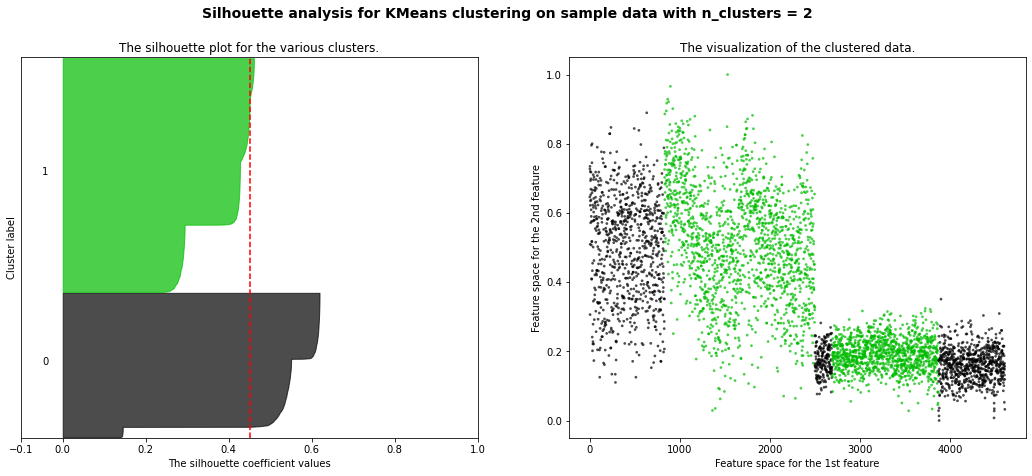

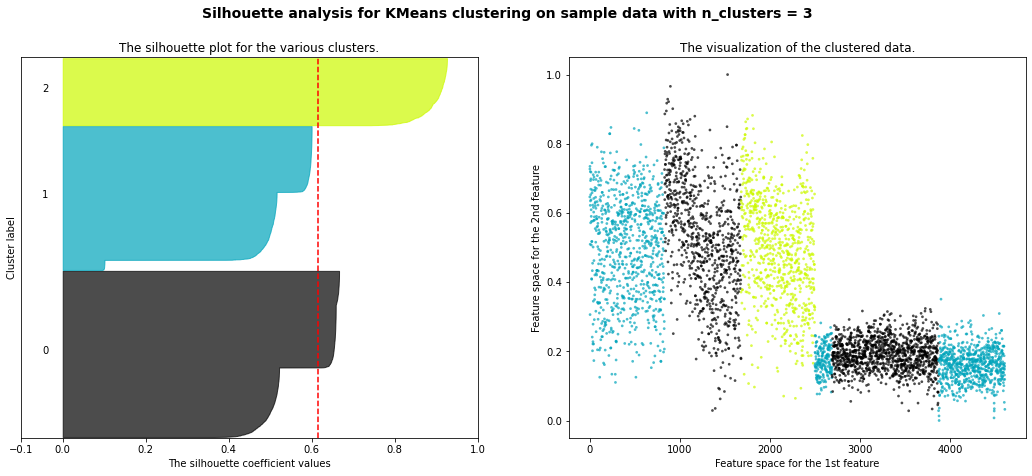

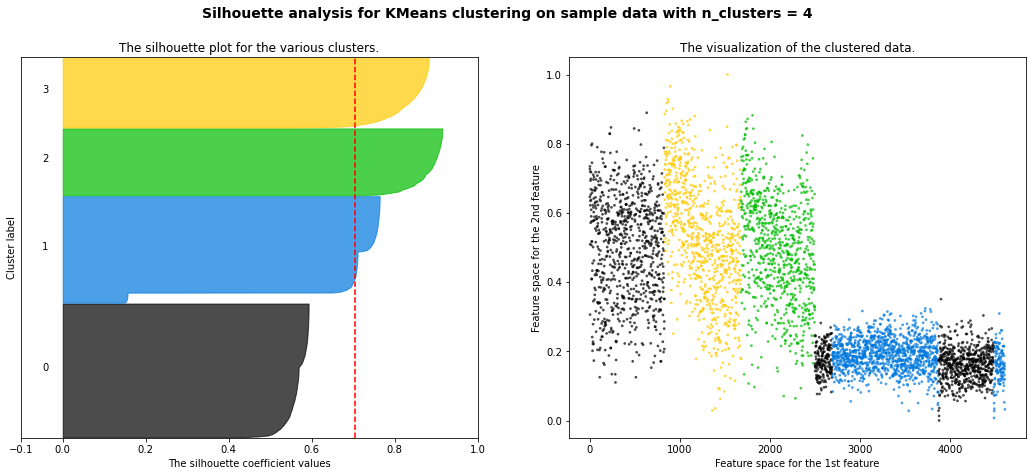

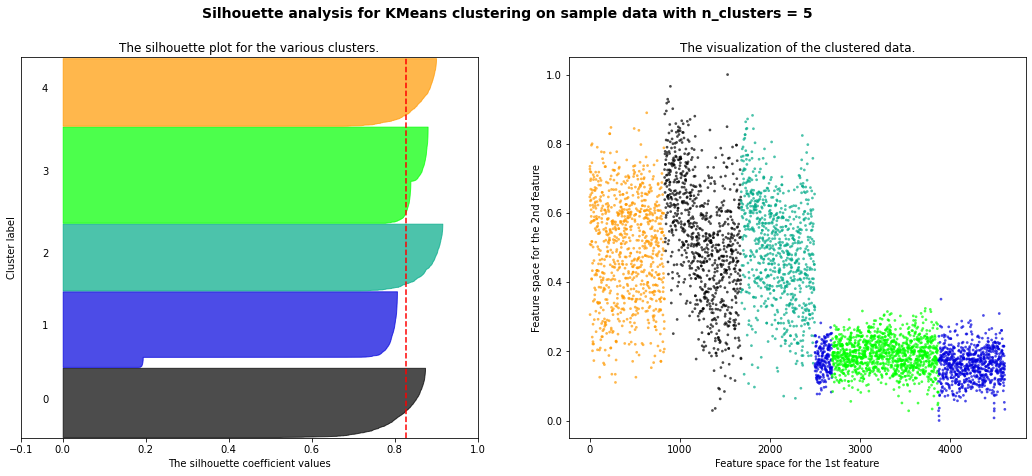

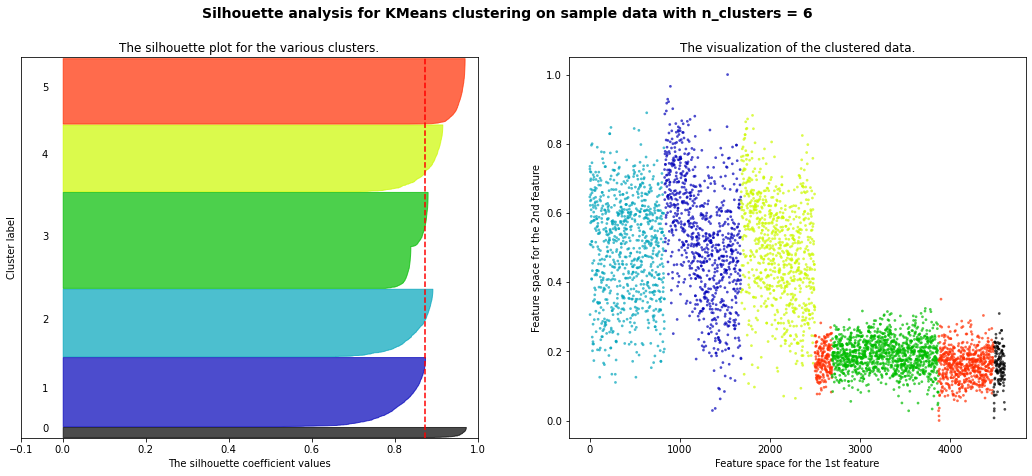

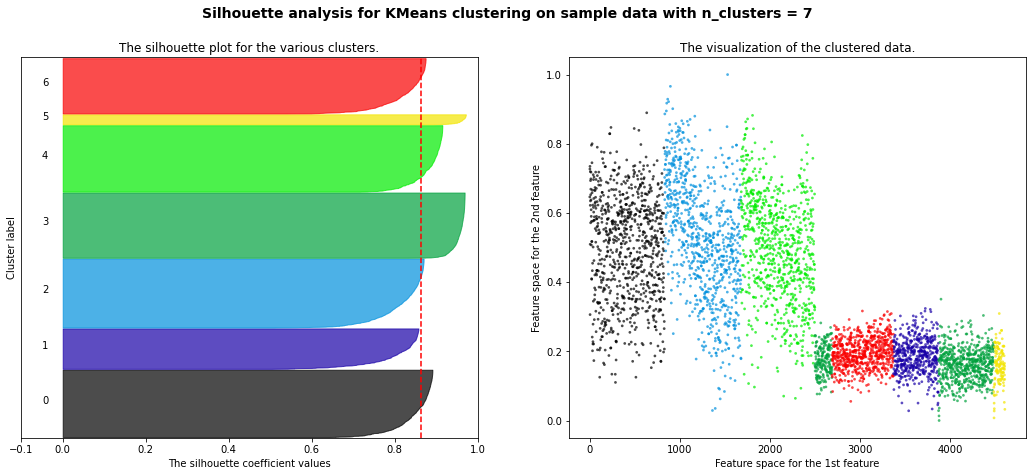

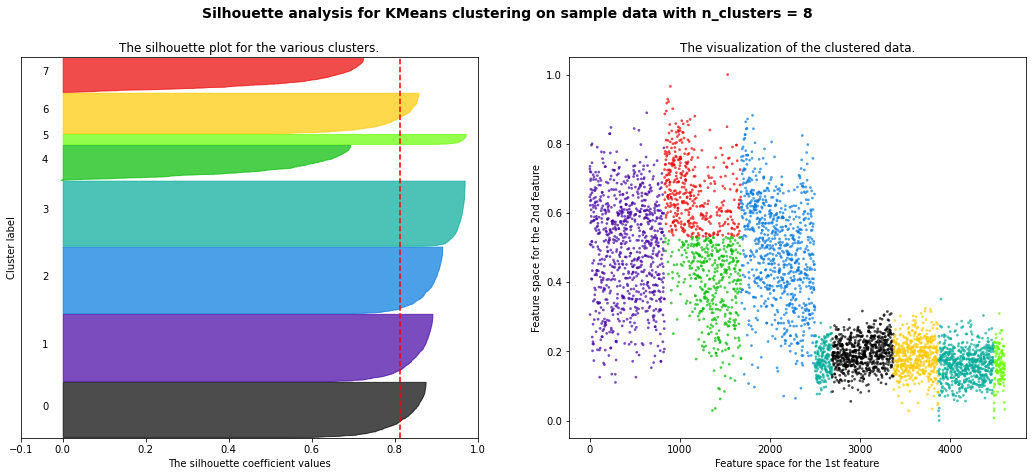

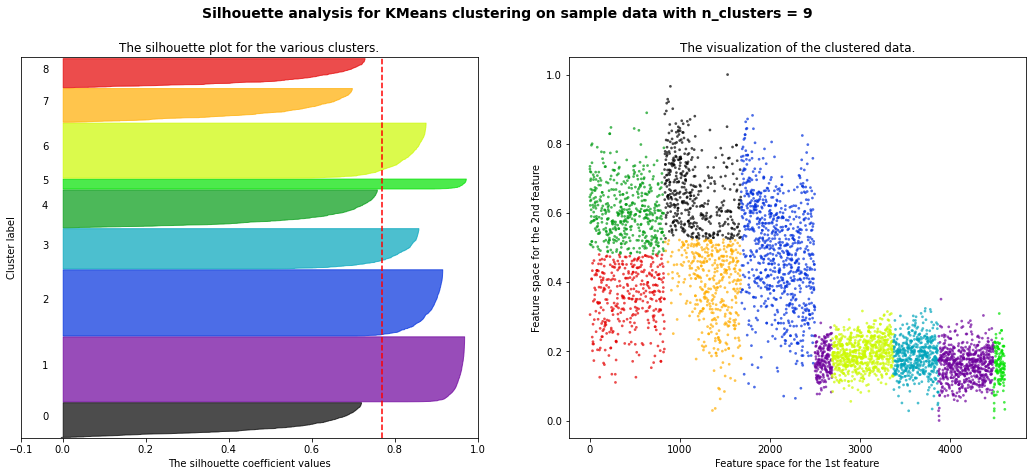

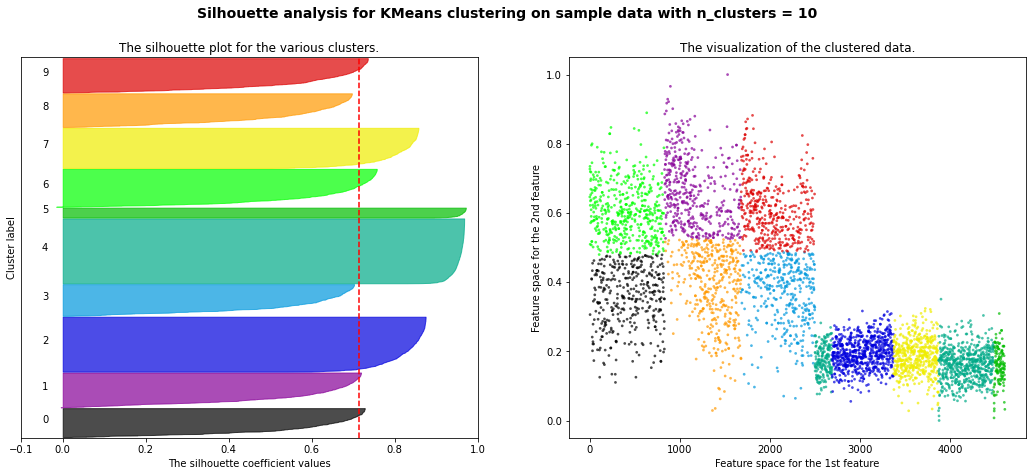

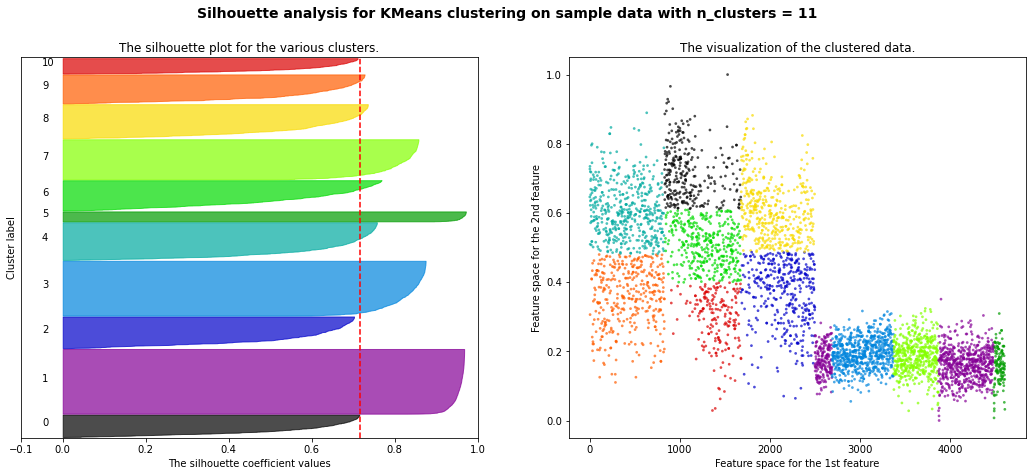

In [38]:
controlled_fft_cluster_df = domingo_band3.drop(columns=['Series', 'Time'])
controlled_fft_cluster_df = pd.get_dummies(controlled_fft_cluster_df)
controlled_fft_cluster_df['stiffener kit'] = controlled_fft_cluster_df['stiffener kit'].astype(int)

# Normalize
controlled_fft_cluster_df.iloc[:, :] = MinMaxScaler().fit_transform(controlled_fft_cluster_df.iloc[:, :])

# Display
display(controlled_fft_cluster_df.head())

controlled_fft_pressures = controlled_fft_cluster_df.pressure.to_numpy()

controlled_fft_cluster_data = controlled_fft_cluster_df.to_numpy()

# Perform clustering
controlled_fft_best_clustering = silhouette_cluster_analysis(controlled_fft_cluster_data, controlled_fft_cluster_df, 'kmeans')
# controlled_fft_best_clustering = silhouette_cluster_analysis(controlled_fft_cluster_data[:, :1], controlled_fft_cluster_df, 'kmeans')

<Figure size 1440x576 with 0 Axes>

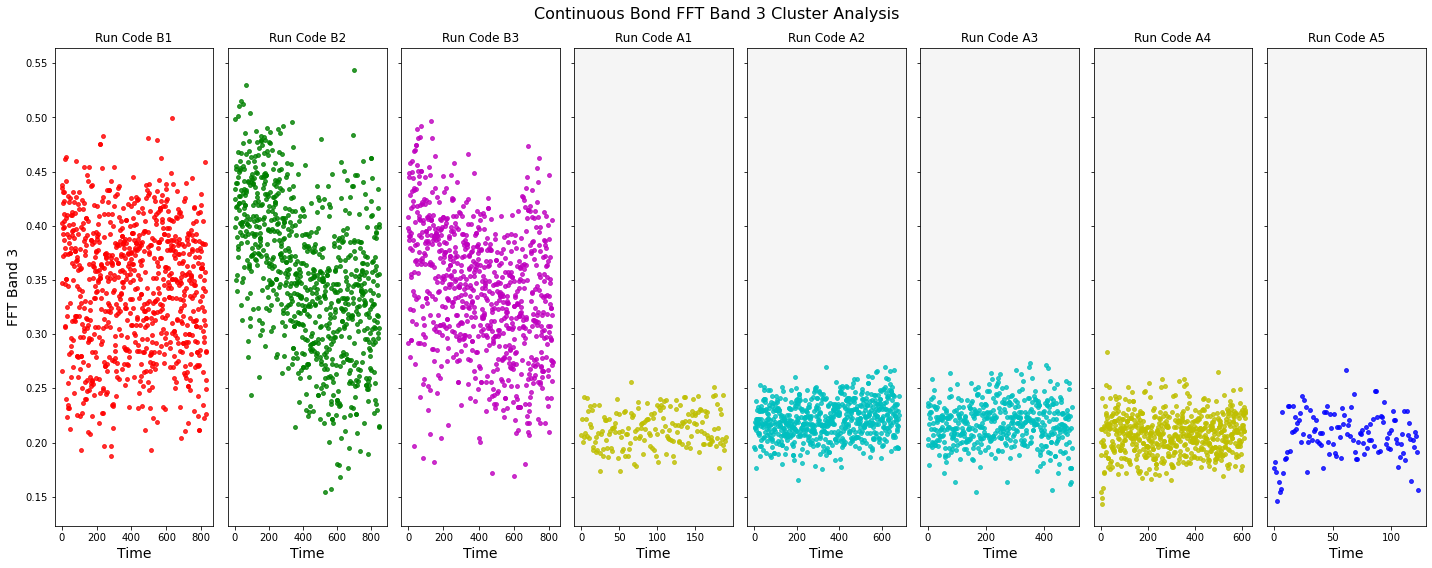

In [109]:
# Add clustering labels to each set of data
start = 0
stop = len(CB_FFT_Band3_B1)
CB_FFT_Band3_B1['cluster label'] = controlled_fft_best_clustering.labels_[start:stop]

start = len(CB_FFT_Band3_B1)
stop = start + len(CB_FFT_Band3_B2)
CB_FFT_Band3_B2['cluster label'] = controlled_fft_best_clustering.labels_[start:stop]

start = stop
stop = start + len(CB_FFT_Band3_B3)
CB_FFT_Band3_B3['cluster label'] = controlled_fft_best_clustering.labels_[start:stop]

start = stop
stop = start + len(CB_FFT_Band3_A1)
CB_FFT_Band3_A1['cluster label'] = controlled_fft_best_clustering.labels_[start:stop]

start = stop
stop = start + len(CB_FFT_Band3_A2)
CB_FFT_Band3_A2['cluster label'] = controlled_fft_best_clustering.labels_[start:stop]

start = stop
stop = start + len(CB_FFT_Band3_A3)
CB_FFT_Band3_A3['cluster label'] = controlled_fft_best_clustering.labels_[start:stop]

start = stop
stop = start + len(CB_FFT_Band3_A4)
CB_FFT_Band3_A4['cluster label'] = controlled_fft_best_clustering.labels_[start:stop]

start = stop
CB_FFT_Band3_A5['cluster label'] = controlled_fft_best_clustering.labels_[start:]

# Plot the clusters in each axis
plt.figure(figsize=((20,8)))
fig, axs = plt.subplots(nrows=1, ncols=8, sharey=True, figsize=(20,8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

def add_to_axis(i, df, title, xlabel='Time'):
    color = colors[np.unique(df['cluster label'])[0]]

    axs[i].scatter(df.index, 
        df['Value'],
        s=15, 
        alpha=.8,
        c=color)
    axs[i].set_title(title)
    axs[i].set_xlabel(xlabel, fontsize=14)
    axs[0].set_ylabel("FFT Band 3", fontsize=14)
    
add_to_axis(0, CB_FFT_Band3_B1, 'Run Code B1')
add_to_axis(1, CB_FFT_Band3_B2, 'Run Code B2')
add_to_axis(2, CB_FFT_Band3_B3, 'Run Code B3')
add_to_axis(3, CB_FFT_Band3_A1, 'Run Code A1')
add_to_axis(4, CB_FFT_Band3_A2, 'Run Code A2')
add_to_axis(5, CB_FFT_Band3_A3, 'Run Code A3')
add_to_axis(6, CB_FFT_Band3_A4, 'Run Code A4')
add_to_axis(7, CB_FFT_Band3_A5, 'Run Code A5')

fig.suptitle("Continuous Bond FFT Band 3 Cluster Analysis", fontsize=16)

# Make the facecolor of the old equipment different in order to make difference more clear
for i in range(3, 8):
    axs[i].set_facecolor('whitesmoke')

# Save figure
plt.tight_layout()
fig.savefig("CB-FFT-Band3-Clustering.png", dpi=300)

C:\Users\camer\anaconda3\envs\general\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\camer\anaconda3\envs\general\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'FFT Band3')

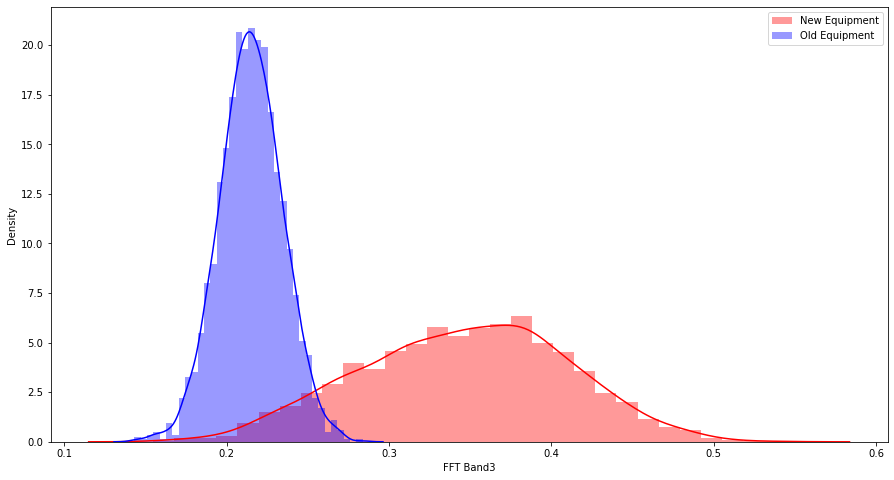

In [48]:
figure(figsize=(15,8))

len_new = len(domingo_band3_new_equip)
len_old = len(domingo_band3_old_equip)

sns.distplot(domingo_band3_new_equip.FFT, color='r', label='New Equipment')
sns.distplot(domingo_band3_old_equip.FFT, color='b', label='Old Equipment')
plt.legend()
plt.xlabel('FFT Band3')